#### <center>Spaghetti and Dumplings Presents:</center>
## <center>Stupid Big Final Project Hooray</center>
# <center>**Best Neighborhood for Surviving an Apocalypse**</center>

### <center> By Daniel Cheng, Sean Morisoli, Brandon Yang </center>

----

# Metrics:

Our main system of determining which neighborhood is the best for surviving a mass extinction event is through our three sub-metrics: Gas Stations, Vaccinations, and Water Sources. Within each sub-metric, each neighborhood is given points determined by their sub-metric rank. These points start at 10 for the number-one-ranked neighborhood and decrease by 2 for each lower rank, giving us the top 5 ranked neighborhoods for each metric.

After each sub-metric ranking is determined, we will combine the scores and find the highest schoring neighborhood for all three metrics.

### <ins> Best Neighborhood for Surviving an Apocalypse</ins>
# Gas Stations
### By Daniel Cheng
----

One of the most vital aspects of surviving an Apocalypse is having a suffiecient amount of fuel. This portion of our project focuses on finding the neighborhoods with the highest density of Fuel Dispensers.

Data set used: https://data.wprdc.org/dataset/allegheny-county-weights-and-measures-inspections/resource/bac0a05c-71b5-4634-96b9-10cc8a20102d

This data set contains a record of stores in Allegheny County with various metrics describing their attributes and verifications. The metric I will be focusing on will be the presense of a fuel dispenser.

In [110]:
#imports needed
import pandas as pd
import matplotlib as mp

#Read CSV File
stores = pd.read_csv("MoreStores.csv")
stores.head()

,_id,store_id,store_name,address,mailing_city,state,zip,municipality,corp_id,neighborhood,...,alternate_phone,price_verification,fuel_dispenser,scale,timing,misc_inspection,oob,unit,shopping_center,new_municipality
0,1016170,29999,SANDY CREEK SUPPLY,140 SANDY CREEK RD,VERONA,PA,15147,VERONA,NaN,NaN,...,NaN,False,False,False,False,False,True,NaN,NaN,PENN HILLS
1,1016171,30000,MIMI MOTHERHOOD MATERNITY,200 MALL CIRCLE DR,MONROEVILLE,PA,15146,MONROEVILLE,NaN,NaN,...,NaN,False,False,False,False,False,True,NaN,MONROEVILLE MALL,MONROEVILLE
2,1016172,30003,EXPRESS FACTORY,200 MALL CIRCLE DR,MONROEVILLE,PA,15146,MONROEVILLE,NaN,NaN,...,NaN,False,False,False,False,False,True,NaN,MONROEVILLE MALL,Monroeville
3,1016173,30004,AMERICAN EAGLE OUTFITTERS,200 MALL CIRCLE DR,MONROEVILLE,PA,15146,MONROEVILLE,NaN,NaN,...,NaN,True,False,False,False,False,False,NaN,MONROEVILLE MALL,Monroeville
4,1016174,30005,GNC,200 MALL CIRCLE DR,MONROEVILLE,PA,15146,MONROEVILLE,NaN,NaN,...,NaN,False,False,False,False,False,True,NaN,MONROEVILLE MALL,Monroeville


# Step 1: Fuel Dispenser Filtering

In order to determine which neighborhood has the highest number of fuel dispensers, I first filtered through the dataset to remove any store that did not have a fuel dispenser.

In [112]:
#Query Mask to filter out stores that have a fuel dispenser
maskFuel = stores['fuel_dispenser'] == True

#Filtered data set with only stores with fuel dispensers
fuel = stores[maskFuel]

fuel.head()

,_id,store_id,store_name,address,mailing_city,state,zip,municipality,corp_id,neighborhood,...,alternate_phone,price_verification,fuel_dispenser,scale,timing,misc_inspection,oob,unit,shopping_center,new_municipality
168,1016338,30216,GET GO STORE,1700 WILLIAM FLYNN HWY,GLENSHAW,PA,15116,GLENSHAW,NaN,NaN,...,NaN,True,True,True,False,False,False,NaN,NaN,Shaler
311,1016481,30409,WALMART,107 WALMART DR,NORTH VERSAILLES,PA,15137,N. VERSAILLES,NaN,NaN,...,NaN,False,True,False,False,False,False,NaN,NaN,North Versailles
312,1016482,30410,SHELL,505 LINCOLN HWY,NORTH VERSAILLES,PA,15137,N. VERSAILLES,NaN,NaN,...,NaN,True,True,False,False,False,False,NaN,NaN,NaN
313,1016483,30411,SUNOCO,903 LINCOLN HWY,NORTH VERSAILLES,PA,15137,N. VERSAILLES,NaN,NaN,...,NaN,True,True,False,False,False,False,NaN,NaN,NaN
315,1016485,30413,GET GO STORE,436 LINCOLN HWY,EAST MC KEESPORT,PA,15035,E. MCKEESPORT,NaN,NaN,...,NaN,True,True,True,False,False,False,NaN,NaN,East McKeesport


# Step 2: Filter Out Stores Without a Neighborhood

Great! Now the only issue with the data set is stores without a labeled neighborhood. In order to solve this, I made another query mask to filter out stores without a neighborhood listed.

In [113]:
#Query Mask to filter out stores without labeled Neighborhood
maskNeigh = fuel['neighborhood'].notnull()

#Filtered Data Set with only stores with neighborhood names
neighFuel = fuel[maskNeigh]

neighFuel.head()

,_id,store_id,store_name,address,mailing_city,state,zip,municipality,corp_id,neighborhood,...,alternate_phone,price_verification,fuel_dispenser,scale,timing,misc_inspection,oob,unit,shopping_center,new_municipality
1082,1017252,31361,SUNOCO,5204 INTERBORO AVE,PITTSBURGH,PA,15207,LINCOLN PLACE,NaN,Lincoln Place,...,NaN,True,True,False,False,False,False,NaN,NaN,Pittsburgh
1282,1017452,31642,BP,1829 W LIBERTY AVE,PITTSBURGH,PA,15226,BROOKLINE,NaN,Brookline,...,NaN,True,True,False,False,False,False,NaN,NaN,Pittsburgh
1283,1017453,31643,SUNOCO,1640 SAW MILL RUN BLVD,PITTSBURGH,PA,15210,BROOKLINE,NaN,Brookline,...,NaN,True,True,False,False,False,False,NaN,NaN,Pittsburgh
1284,1017454,31644,AMOCO,1709 SAW MILL RUN BLVD,PITTSBURGH,PA,15210,BROOKLINE,NaN,Brookline,...,NaN,True,True,False,False,False,False,NaN,NaN,Pittsburgh
1285,1017455,31645,EXXON,1101 BROOKLINE BLVD,PITTSBURGH,PA,15226,BROOKLINE,NaN,Brookline,...,NaN,True,True,False,True,False,False,NaN,NaN,Pittsburgh




With this, I now have a data set containing only stores with a labeled neighborhood and a fuel dispenser.



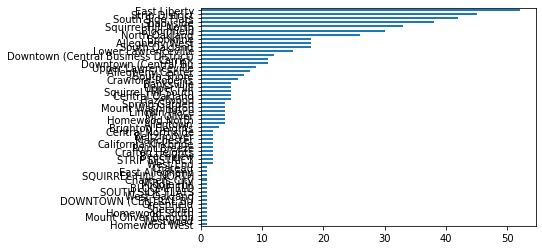

In [90]:
#Plot of new dataset
fuelNeigh.plot.barh()

# Step 4: More Filtering!

Now all we need to do is set a filter to reduce the number of neighborhoods we look at. I set up a filter to only include neighborhoods with more than 1 store containing a fuel dispenser.

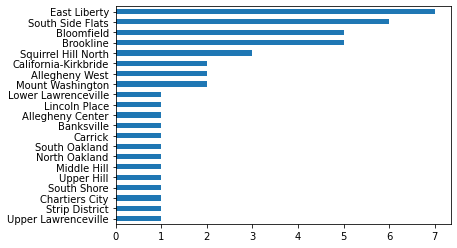

In [114]:
def filter_less_than(grouped, threshold):
    if len(grouped) < threshold:
        return False
    return True

# Filter dataset to contain only neighborhoods with at least one store with a fuel pump
pop = neighFuel.groupby("neighborhood").filter(filter_less_than, 
                                                     threshold=1)

final = pop['neighborhood'].value_counts().sort_values(ascending=True)

final.plot.barh()

# Conclusion: Best Neighborhoods to Find Fuel

According to the data set, the top 5 best neighborhoods with the highest density of gas stations are:

1. East Liberty --> 10 points
2. South Side Flats --> 8 points
3. Bloomfield --> 6 points
4. Brookline --> 6 points
5. Squirrel Hill North --> 4 points

### <ins> Best Neighborhood for Surviving an Apocalypse</ins>
## Most Vaccinated Neighborhood
### By Sean
----

## Sorted Table

The code below groups the vaccination data by 'neighborhood_municipality' and sorts them by their accumulative amount of 'bivalent_boosters'. Displaying the top 5 neighborhoods with the highest accumulative vaccinations.

In [5]:
# Import statements
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [6]:
# Reads the CSV file into a DataFrame
vacs = pd.read_csv("vacs.tsv", sep="\t")

In [7]:
# Groups by 'neighborhood_municipality' and calculate the sum of 'bivalent_booster' for each group
num_vacs = vacs.groupby('neighborhood_municipality')['bivalent_booster'].sum().reset_index()

# Sorts the DataFrame by the accumulated 'bivalent_booster'
num_vacs = num_vacs.sort_values(by='bivalent_booster', ascending=False)

# Displays the sorted DataFrame
num_vacs.head(5)

,neighborhood_municipality,bivalent_booster
124,Mount Lebanon,10901
143,Penn Hills,7999
18,Bethel Park,7968
161,Ross,7686
116,McCandless,7579


* As shown in the table above, **Mount Lebanon** has the most amount of individuals who have recieved their bivalent booster dose out of all the Pittsburgh neighborhoods. 

----

## Top 5 Neighborhood Bar Graph

The code below uses the top 5 neighborhoods with the highest accumulatibe bivalent booster vaccinations, and then plots the data onto a bar graph.

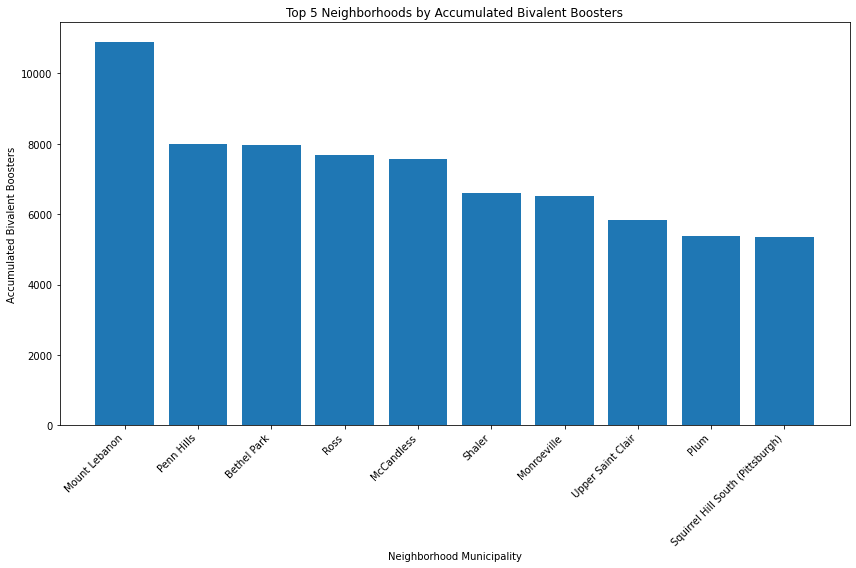

In [9]:
top5_vacs = num_vacs.head(10)

# Plotting the bar graph for the top 5 neighborhoods
plt.figure(figsize=(12, 8))
plt.bar(top5_vacs['neighborhood_municipality'],top5_vacs['bivalent_booster'])
plt.xlabel('Neighborhood Municipality')
plt.ylabel('Accumulated Bivalent Boosters')
plt.title('Top 5 Neighborhoods by Accumulated Bivalent Boosters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot

plt.show()

* Although **Penn Hills** and **Bethel Park** are tied for second place, **Mount Lebanon** still has a large lead of over <ins>3,000</ins> individuals who recieved the bivalent booster.
----

## Cumulative Sum Graph

The code below processes vaccination data, calculates the cumulative sum of bivalent booster vaccinations within each neighborhood, identifies the top 25 neighborhoods with the highest cumulative sums, and then plots the cumulative vaccination trends over time for these top neighborhoods.

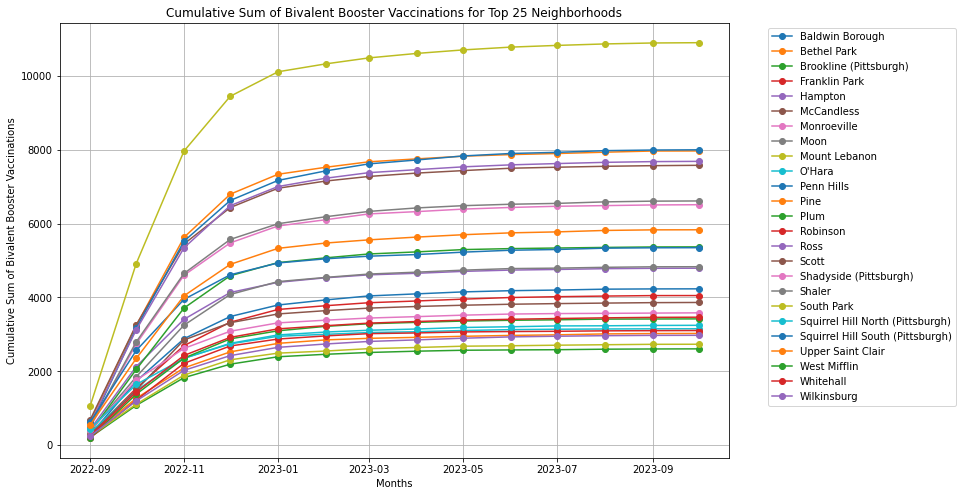

In [13]:
# Convert the 'month' column to datetime format
vacs['month'] = pd.to_datetime(vacs['month'])

# Sort the DataFrame by 'neighborhood_municipality' and 'month'
vacs = vacs.sort_values(by=['neighborhood_municipality', 'month'])

# Create a new DataFrame cumsum_vacs
cumsum_vacs = pd.DataFrame(columns=['months', 'neighborhood_municipality', 'bivalent_booster'])

# Calculate the cumulative sum within each neighborhood
cumsum_vacs['months'] = vacs['month']
cumsum_vacs['neighborhood_municipality'] = vacs['neighborhood_municipality']
cumsum_vacs['bivalent_booster'] = vacs.groupby('neighborhood_municipality')['bivalent_booster'].cumsum()

# Calculate the sum of 'bivalent_booster' for each neighborhood
neighborhood_sums = cumsum_vacs.groupby('neighborhood_municipality')['bivalent_booster'].max()

# Select the top 25 neighborhoods
top_25_neighborhoods = neighborhood_sums.nlargest(25).index

# Filter the DataFrame for the top 25 neighborhoods
cumsum_vacs_top_25 = cumsum_vacs[cumsum_vacs['neighborhood_municipality'].isin(top_25_neighborhoods)]

# Plot the cumulative sum for each neighborhood
plt.figure(figsize=(12, 8))
for neighborhood, group in cumsum_vacs_top_25.groupby('neighborhood_municipality'):
    plt.plot(group['months'], group['bivalent_booster'], label=neighborhood, marker='o', linestyle='-')
    
plt.title('Cumulative Sum of Bivalent Booster Vaccinations for Top 25 Neighborhoods')
plt.xlabel('Months')
plt.ylabel('Cumulative Sum of Bivalent Booster Vaccinations')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

* It can be seen in the accumulative sum graph above how big of a difference there is in the amount of individuals who recieved the bivalent booster from **Mount Lebanon** than any other neighborhood in Pittsburgh. 
____

## Top 5 Most Vaccinated Neighborhood by Population Percentage


Using one last test, I wanted to see which of the calculated top 5 neighborhoods has recieved the most amount of bivalent boosters per the neighborhood's population. This can be calculated with the forumla shown below:

#### Accumulative Sum of People Vaccinated per Neighborhood ÷ Population of Neighborhood = <ins>% of People Vaccinated per Neighborhood</ins>

* There is a slight flaw in this prediction however, as the **[census](www.census.gov)** used for each neighborhood was last updated on 07/2022, while vaccination dataset used is elapsed from 09/2022-09/2023. So although the calculations below may flawed, they give a rough depiction of the percentage of how many individuals recieved the bivalent booster to those who did not in a neighborhood.

##### 1. Mount Lebanon: 10901 / 33218 ≈ 33%
##### 2. Penn Hills: 7999 / 40120 ≈ 20%
##### 3. Bethel Park: 7968 / 32782 ≈ 24%
##### 4. Ross: 7686 / 32819 ≈ 23%
##### 5. McCandless: 7579 / 29038 ≈ 26%

* The calculations above show that **Mount Lebanon** holds the highest percentage of bivalent booster vaccinated individuals in its population. Again, while this data may be slightly inaccurate due to the outdated census, it gives a rough appromximation of which of the top 5 neighborhoods has the highest census percetanage that is vaccinated.

----
## Conclusion

After creating a rough approximaton of which neighborhod has the highest percentage of bivalent booster vaccinated individuals in its population, the standings for which neighborhood is the most vaccinated can be slightly altered to this:

##### 1. **Mount Lebanon:** 10901 → 33% of pop. vaccinated --> 10 points
##### 2. **McCandless:** 7579 → 26% of pop. vaccinated --> 8 points
##### 3. **Bethel Park:** 7968 → 24% of pop. vaccinated --> 6 points
##### 4. **Ross:** 7686 → 23% of pop. vaccinated --> 4 points
##### 5. **Penn Hills:** 7999 → 20% of pop. vaccinated --> 2 points

* Standings for this section of the best neighborhood to survive the apocalypse study were based on the calculations done on census percentage. This is done to maximize your chances to encounter other vaccinated survivers, giving you a greater chance to build a strong community of suriviors during the end of the world. 


<br>

In conclusion, it can be seen that through various tests, **Mount Lebanon** takes the title of the most vaccinated neighborhood in Pittsburgh.

### <ins> Best Neighborhood for Surviving an Apocalypse</ins>
# Water Features
#### by Brandon
----
When discussing surviving in an apocalypse, water resources is a key factor. While the household water supply might be cut, it's necessary to turn to public water features for help.

By searching through the WPRDC site, I selected a dataset recording water features in Pittsburgh.

I'm diving into the data to find which neighborhood has the best-equipped water features.

The initial step is determining which neighborhood has the most water features.

First things first, let's load the data into the pandas.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("WaterFeatures.csv",index_col="_id")
data.head(10)

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,
1,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408440,-80.028330
2,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440453,-79.984064
3,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454390,-80.008281
4,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450874,-80.001962
5,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451003,-80.001502
6,1230448600,Alton Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003191600,5,19,6,4-28,40.414280,-80.021457
7,887743707,Ammon Park Building,On/Off,Drinking Fountain,f,Murdock,https://tools.wprdc.org/images/pittsburgh/wate...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449286,-79.977871
8,1767127832,Ammon Park Spray,NaN,Spray,f,NaN,https://tools.wprdc.org/images/pittsburgh/wate...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449152,-79.978111
9,354464900,Armstrong Park,On/Off,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428300,-79.986198


The first goal is to sort out different water features owned by different neighborhoods and compare the numbers of them.



I use pandas to count numbers of water features in different neighborhoods. 

Since some part of the dataset is missing, it is assumed that all features are available so all of them are counted.

In [3]:
test = data['neighborhood'].value_counts().sort_values(ascending=True)
test

Spring Garden           1
Fineview                1
Bluff                   1
Homewood South          1
Middle Hill             1
                       ..
Terrace Village         8
Allegheny Center        8
Bloomfield              8
Highland Park          12
Squirrel Hill South    14
Name: neighborhood, Length: 66, dtype: int64

Now we have a data frame containing only neighborhood names and counts, the next step is to plot it.

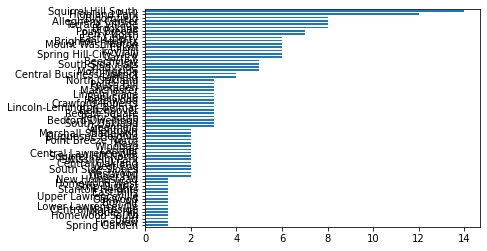

In [5]:
test.plot(kind = 'barh')

##### **Ouch**
The density of this bar chat is too high, it's hard to read anything from it www.

Luckily, we can now conclude that since there are obvious regional differences, the best neighborhood should be in the first 10 neighborhoods.

Text(0, 0.5, 'Neighborhood')

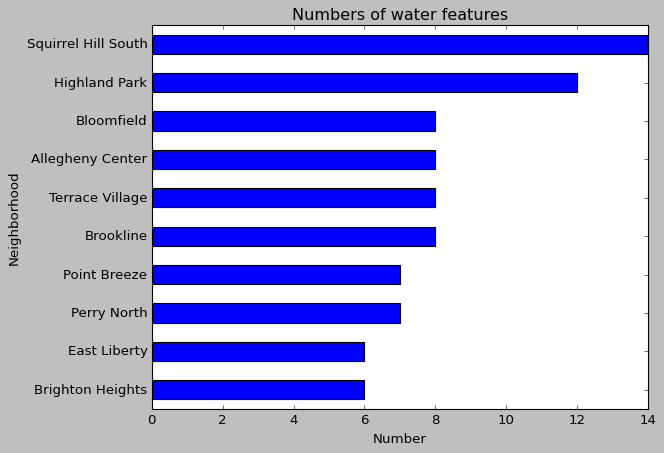

In [42]:
test1 = data['neighborhood'].value_counts().sort_values(ascending=True)
test1 = test1.iloc[56:66]
plt.style.use('fast')
test1.plot(kind = 'barh')
plt.title('Numbers of water features')
plt.xlabel("Number")
plt.ylabel("Neighborhood")

That's better now, the initial conclusion is now *Squirrel Hill South* owns most water facilities.

##### **However**

Isn't there any chance for *Highland Park* or *Bloomfield* to win?

Different kinds of water features' water quality are different, a drinking fountain is always better than a spray. Sometimes, quality beats quantity. So, it's necessary to take a deeper look into the data and balance between quality and quantity.

![Drinking Fountain](https://tools.wprdc.org/images/pittsburgh/water_features/Bud_Hammer_Park.jpg)
![Spray](https://tools.wprdc.org/images/pittsburgh/water_features/Chadwick_Park_Spray.jpg)

### Here comes the metric!

Since the neighborhood with the best water features is wanted, each facility in the neighborhood contributes more or less to the overall facilities. Therefore, points for each neighborhood are calculated accumlatively.

For each **Drinking Fountain**, add `+2` points to the neighborhood.

For each **Spray or other facilities**, add `+1` point to the neighborhood.

##### So，
The next step is to find out and calculate points for the best ten neighborhoods.

In [7]:
pointBoard = dict() #create a new dictionary

for index, row in data.iterrows():
    try: #for an recorded neighborhood, add points to it accordingly
        if row['feature_type'] == 'Drinking Fountain': pointBoard[row['neighborhood']]+= 2
        else: pointBoard[row['neighborhood']] += 1
    except: #for a new neighborhood, create a new entry 
        if row['feature_type'] == 'Drinking Fountain': pointBoard[row['neighborhood']]= 2
        else: pointBoard[row['neighborhood']] = 1
pointBoard

{'Beechview': 10,
 'Crawford-Roberts': 6,
 'Allegheny Center': 13,
 'Bedford Dwellings': 4,
 'South Side Flats': 8,
 'Banksville': 6,
 'Bloomfield': 15,
 'Bon Air': 2,
 'Central Oakland': 3,
 'Brighton Heights': 10,
 'Brookline': 15,
 'Hazelwood': 6,
 'Lincoln-Lemington-Belmar': 5,
 'Windgap': 3,
 'Troy Hill': 12,
 'Homewood West': 2,
 'Squirrel Hill South': 26,
 'Strip District': 2,
 'Stanton Heights': 2,
 'East Hills': 2,
 'Duquesne Heights': 3,
 'South Oakland': 5,
 'East Liberty': 9,
 'Highland Park': 23,
 'Garfield': 7,
 'Greenfield': 6,
 'Perry South': 6,
 'Point Breeze': 11,
 'Regent Square': 6,
 'Allentown': 4,
 'Hays': 4,
 'Elliott': 12,
 'Morningside': 8,
 'Central Northside': 2,
 'Terrace Village': 15,
 'Larimer': 3,
 'Carrick': 12,
 'Central Lawrenceville': 3,
 'Lincoln Place': 6,
 'Manchester': 6,
 'Marshall-Shadeland': 4,
 'Upper Lawrenceville': 2,
 'Sheraden': 6,
 'Beltzhoover': 6,
 'Shadyside': 10,
 'Mount Washington': 12,
 'Oakwood': 2,
 'Perry North': 14,
 'Upper Hill

Now, our next step is to plot the dictionary

Text(0, 0.5, 'Neighborhood')

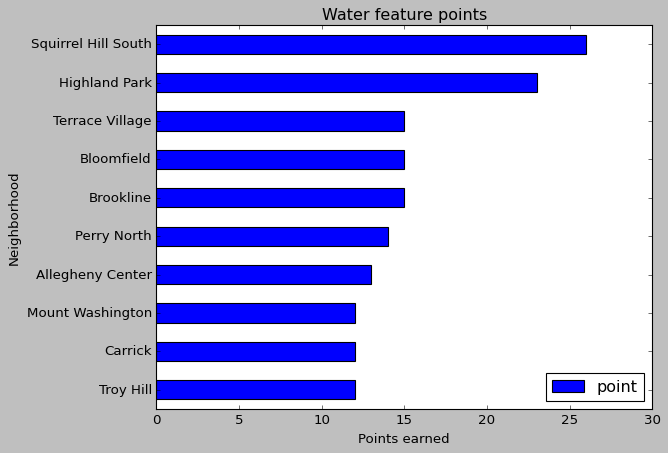

In [45]:
key = pointBoard.keys()
value = pointBoard.values()
# put the keys and values of the dictionary into a data frame
df = pd.DataFrame(value, key)
df.set_axis(['point'], axis = 'columns', inplace = True)

df = df.sort_values(by=['point'], ascending=True) # sort the data frame
df = df.iloc[56:66] #pick out the first ten

#set the style and labels to plot the dictionary
plt.style.use('fast')
df.plot(kind = 'barh')
plt.title('Water feature points')
plt.xlabel("Points earned")
plt.ylabel("Neighborhood")

### Conclusion:
Whether only considering the number of water facilities or considering water quality, *Squirrel Hill South* has done an outstanding job. So, I would conclude that *Squirrel Hill South* is the best neighborhood to survive in an apocalypse if you want enough water.

Top 5:

1. Squirrel Hill South --> 10 points
2. Highland Park --> 8 points
3. Terrace Village --> 6 points
4. Bloomfield --> 6 points
5. Brookline --> 6 points


----

### <ins> Best Neighborhood for Surviving an Apocalypse</ins>


# Conclusion

Here is our combined list of scores for the neighborhoods we reviewed:

1. Squirell Hill South --> 14 points
2. Bloomfield --> 12 points
3. Brookline --> 12 points
4. Mt. Lebanon --> 10 points
5. Est. Libery --> 10 points
6. McCandless --> 8 points
7. Highland Park --> 8 points
8. South Side Flats --> 8 points
9. Terrace Village --> 6 points
10. Bethel Park --> 6 points
11. Ross --> 4 points
12. Penn Hills --> 2 points

According to our metrics, Squirell Hill South is the best neighborhood to survive the apocalyse in! 
# Final Conclusion: Squirell Hill South
## HOORAY RAHHH RAHHHHHH URAHHHHHHHHH

# **Reflections**:

**Daniel:**

Although I have not personally explored Pittsburgh to the degree to which I would be able to properly determine the best post-apocalyptic hide-out, I think our analysis puts together some good metrics to find a suitable spot. Outside of this project, I probably would have put together similar metrics and come to a similar conclusion, so I was happy with how our results turned out.
    
**Sean:** 

I can’t exactly say that I’m looking forward to the prospect of an apocalypse happening in Pittsburgh, but I can say that I was hoping Shadyside would win the title of “Best Neighborhood to Survive an Apocalypse” purely because it is the neighborhood I am most familiar with, as well as the one I have explored the most. I do like Squirrel Hill from the little time I’ve spent there, so regardless I am happy with the results. 
    
**Brandon:**

I have explored some neighborhoods in Pittsburgh and the one I like most is Oakland where I reside. However, after diving into different datasets and analyzed I would like to accept the fact that Squirrel Hill South is the best neighborhood to survive and apocalypse. I did go to Squirrel Hill South once and I liked it. So I’m happy with our outcome.